In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.express as px 
from datetime import datetime

In [4]:
covid_df = pd.read_csv(r"C:\Users\Alekh\Downloads\archive (2)\usa_county_wise.csv")
covid_df.head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0
5,63072005,PR,PRI,630,72005.0,Aguadilla,Puerto Rico,US,18.459681,-67.120815,"Aguadilla, Puerto Rico, US",1/22/20,0,0
6,63072007,PR,PRI,630,72007.0,Aguas Buenas,Puerto Rico,US,18.251619,-66.126806,"Aguas Buenas, Puerto Rico, US",1/22/20,0,0
7,63072009,PR,PRI,630,72009.0,Aibonito,Puerto Rico,US,18.131361,-66.264131,"Aibonito, Puerto Rico, US",1/22/20,0,0
8,63072011,PR,PRI,630,72011.0,Anasco,Puerto Rico,US,18.287985,-67.120611,"Anasco, Puerto Rico, US",1/22/20,0,0
9,63072013,PR,PRI,630,72013.0,Arecibo,Puerto Rico,US,18.406631,-66.675077,"Arecibo, Puerto Rico, US",1/22/20,0,0


In [5]:
covid_df.describe()

,UID,code3,FIPS,Lat,Long_,Confirmed,Deaths
count,6.279200e+05,627920.000000,626040.000000,627920.000000,627920.000000,627920.000000,627920.000000
mean,8.342958e+07,834.491617,33061.684685,36.707212,-88.601474,357.284285,17.536328
std,4.314702e+06,36.492620,18636.156825,9.061572,21.715747,3487.282694,300.991466
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000,0.000000
25%,8.401811e+07,840.000000,19079.000000,33.895587,-97.790204,0.000000,0.000000
50%,8.402921e+07,840.000000,31014.000000,38.002344,-89.486710,4.000000,0.000000
75%,8.404612e+07,840.000000,47131.000000,41.573069,-82.311265,63.000000,1.000000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,224051.000000,23500.000000


In [6]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627920 entries, 0 to 627919
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             627920 non-null  int64  
 1   iso2            627920 non-null  object 
 2   iso3            627920 non-null  object 
 3   code3           627920 non-null  int64  
 4   FIPS            626040 non-null  float64
 5   Admin2          626792 non-null  object 
 6   Province_State  627920 non-null  object 
 7   Country_Region  627920 non-null  object 
 8   Lat             627920 non-null  float64
 9   Long_           627920 non-null  float64
 10  Combined_Key    627920 non-null  object 
 11  Date            627920 non-null  object 
 12  Confirmed       627920 non-null  int64  
 13  Deaths          627920 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 67.1+ MB


In [7]:
covid_df.drop['Lat']

TypeError: 'method' object is not subscriptable

In [8]:
covid_v = pd.read_csv(r"C:\Users\Alekh\Downloads\archive (4)\COVID-19_Vaccinations_in_the_United_States_County.csv")
covid_v.head(10)

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,11/18/2021,05075,46,Lawrence County,AR,42.3,6938,6938.0,49.4,6534,...,C,11.0,11.0,12.0,12.0,Non-metro,7.0,7.0,8.0,8.0
1,11/18/2021,01053,46,Escambia County,AL,33.1,12112,12112.0,38.8,11677,...,D,14.0,14.0,15.0,15.0,Non-metro,6.0,6.0,7.0,7.0
2,11/18/2021,19171,46,Tama County,IA,58.0,9777,9777.0,68.8,9132,...,B,8.0,8.0,8.0,8.0,Non-metro,8.0,8.0,8.0,8.0
3,11/18/2021,06043,46,Mariposa County,CA,0.0,0,0.0,0.0,0,...,C,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
4,11/18/2021,19097,46,Jackson County,IA,49.2,9568,9568.0,57.4,9217,...,A,3.0,4.0,4.0,4.0,Non-metro,7.0,8.0,8.0,8.0
5,11/18/2021,21009,46,Barren County,KY,41.5,18351,18351.0,49.1,17377,...,D,15.0,15.0,16.0,16.0,Non-metro,7.0,7.0,8.0,8.0
6,11/18/2021,27077,46,Lake of the Woods County,MN,51.8,1939,1937.0,58.8,1860,...,A,4.0,4.0,4.0,4.0,Non-metro,8.0,8.0,8.0,8.0
7,11/18/2021,72079,46,Lajas Municipio,PR,70.7,15565,15562.0,79.3,14393,...,D,16.0,16.0,16.0,16.0,Metro,4.0,4.0,4.0,4.0
8,11/18/2021,37001,46,Alamance County,NC,52.5,89037,88967.0,61.3,83448,...,D,16.0,16.0,16.0,16.0,Metro,4.0,4.0,4.0,4.0
9,11/18/2021,02180,46,Nome Census Area,AK,61.9,6189,6158.0,81.4,5379,...,D,16.0,16.0,16.0,16.0,Non-metro,8.0,8.0,8.0,8.0


In [19]:
#droping a colums
covid_df.drop(["iso2", "iso3", "Lat", "Long_"], inplace = True, axis=1)

,UID,code3,FIPS,Admin2,Province_State,Country_Region,Combined_Key,Date,Confirmed,Deaths
0,16,16,60.0,NaN,American Samoa,US,"American Samoa, US",1/22/20,0,0
1,316,316,66.0,NaN,Guam,US,"Guam, US",1/22/20,0,0
2,580,580,69.0,NaN,Northern Mariana Islands,US,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,630,72001.0,Adjuntas,Puerto Rico,US,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,630,72003.0,Aguada,Puerto Rico,US,"Aguada, Puerto Rico, US",1/22/20,0,0


In [23]:
covid_df.drop(["code3","Admin2", "FIPS"],inplace = True,axis =1)

In [24]:
covid_df.head(10)

,UID,Province_State,Country_Region,Combined_Key,Date,Confirmed,Deaths
0,16,American Samoa,US,"American Samoa, US",1/22/20,0,0
1,316,Guam,US,"Guam, US",1/22/20,0,0
2,580,Northern Mariana Islands,US,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,Puerto Rico,US,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,Puerto Rico,US,"Aguada, Puerto Rico, US",1/22/20,0,0
5,63072005,Puerto Rico,US,"Aguadilla, Puerto Rico, US",1/22/20,0,0
6,63072007,Puerto Rico,US,"Aguas Buenas, Puerto Rico, US",1/22/20,0,0
7,63072009,Puerto Rico,US,"Aibonito, Puerto Rico, US",1/22/20,0,0
8,63072011,Puerto Rico,US,"Anasco, Puerto Rico, US",1/22/20,0,0
9,63072013,Puerto Rico,US,"Arecibo, Puerto Rico, US",1/22/20,0,0


In [34]:
#finding the acitive cases 
covid_df['active_cases'] = covid_df['Confirmed'] - (covid_df['Deaths'])
covid_df.tail(10)

,UID,Province_State,Country_Region,Combined_Key,Date,Confirmed,Deaths,active_cases
627910,84070002,Massachusetts,US,"Dukes and Nantucket,Massachusetts,US",7/27/20,95,24,71
627911,84070003,Missouri,US,"Kansas City,Missouri,US",7/27/20,4949,3,4946
627912,84070004,Michigan,US,"Michigan Department of Corrections (MDOC), Mic...",7/27/20,4124,68,4056
627913,84070005,Michigan,US,"Federal Correctional Institution (FCI), Michig...",7/27/20,192,5,187
627914,84070015,Utah,US,"Bear River, Utah, US",7/27/20,2099,5,2094
627915,84070016,Utah,US,"Central Utah, Utah, US",7/27/20,347,1,346
627916,84070017,Utah,US,"Southeast Utah, Utah, US",7/27/20,70,0,70
627917,84070018,Utah,US,"Southwest Utah, Utah, US",7/27/20,2781,23,2758
627918,84070019,Utah,US,"TriCounty, Utah, US",7/27/20,142,0,142
627919,84070020,Utah,US,"Weber-Morgan, Utah, US",7/27/20,2375,24,2351


In [35]:
#creating a pivot table using pandas 
covid_df.drop(["Country_Region"],inplace = True,axis =1)

In [36]:
state_wise = pd.pivot_table(covid_df, values = ["Confirmed","active_cases","Deaths"], 
                            index = "Province_State" , aggfunc = max)

In [38]:
state_wise["Recovery Rate"] = state_wise["Confirmed"]*100 / state_wise["active_cases"]

In [39]:
state_wise["Mortality Rate"] = state_wise["Deaths"]*100 / state_wise["Confirmed"]

In [40]:
state_wise = state_wise.sort_values(by="Confirmed", ascending =False)

In [41]:
state_wise.style.background_gradient(cmap='cubehelix')

,Confirmed,Deaths,active_cases,Recovery Rate,Mortality Rate
Province_State,,,,,
New York,224051,23500,200551,111.717718,10.488683
California,176028,4375,171653,102.548747,2.485400
Arizona,109988,1808,108181,101.670349,1.643816
Florida,107315,1404,105911,101.325641,1.308298
Illinois,103008,4842,98166,104.932461,4.700606
Texas,66190,655,65535,100.999466,0.989575
Nevada,37492,606,36886,101.642900,1.616345
Pennsylvania,29803,1678,28125,105.966222,5.630306
Michigan,26161,2789,23378,111.904355,10.660907


In [51]:
# Top 10 active cases states
top_10_state_active_cases = covid_df.groupby(by='Province_State').max()[['active_cases','Date']].sort_values(by=['active_cases'],ascending=False).reset_index()

In [52]:
top_10_state_active_cases

,Province_State,active_cases,Date
0,New York,200551,7/9/20
1,California,171653,7/9/20
2,Arizona,108181,7/9/20
3,Florida,105911,7/9/20
4,Illinois,98166,7/9/20
5,Texas,65535,7/9/20
6,Nevada,36886,7/9/20
7,Pennsylvania,28125,7/9/20
8,Massachusetts,23437,7/9/20
9,Michigan,23378,7/9/20


In [76]:
fig = plt.figure(figsize = (16,9))

<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Top 10 states with most active cases in US')

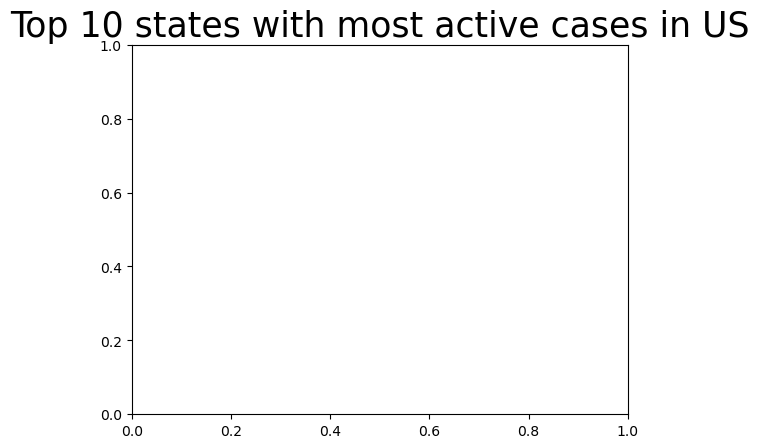

In [77]:
plt.title("Top 10 states with most active cases in US",size = 25)

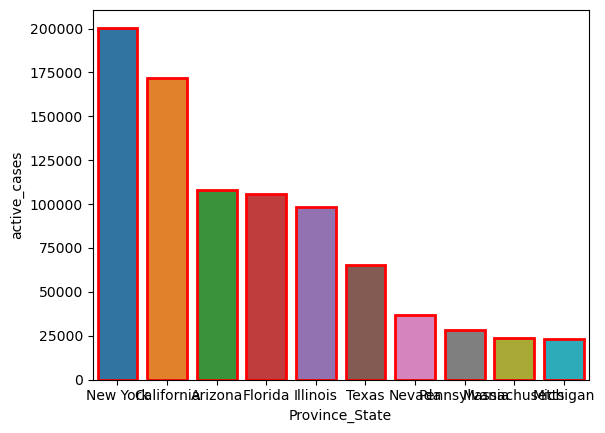

In [80]:
ax = sns.barplot(data = top_10_state_active_cases.iloc[:10], y = 'active_cases', x = 'Province_State',linewidth = 2,edgecolor ='red')

Text(0.5, 0, 'States')

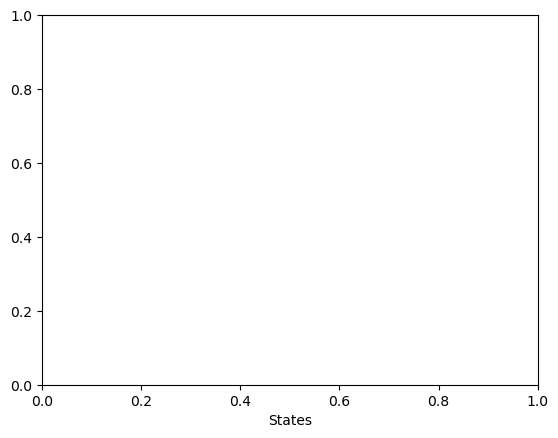

In [81]:
plt.xlabel("States")

Text(0, 0.5, 'active cases')

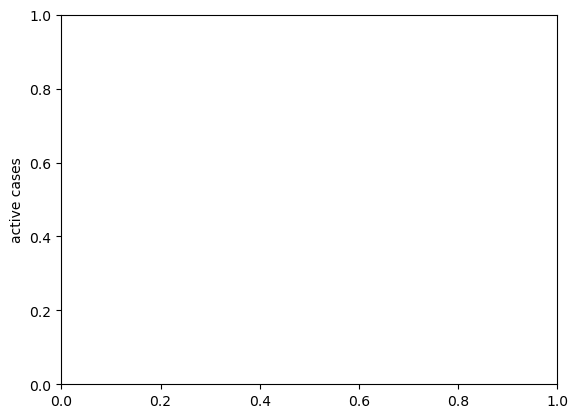

In [82]:
plt.ylabel("active cases")

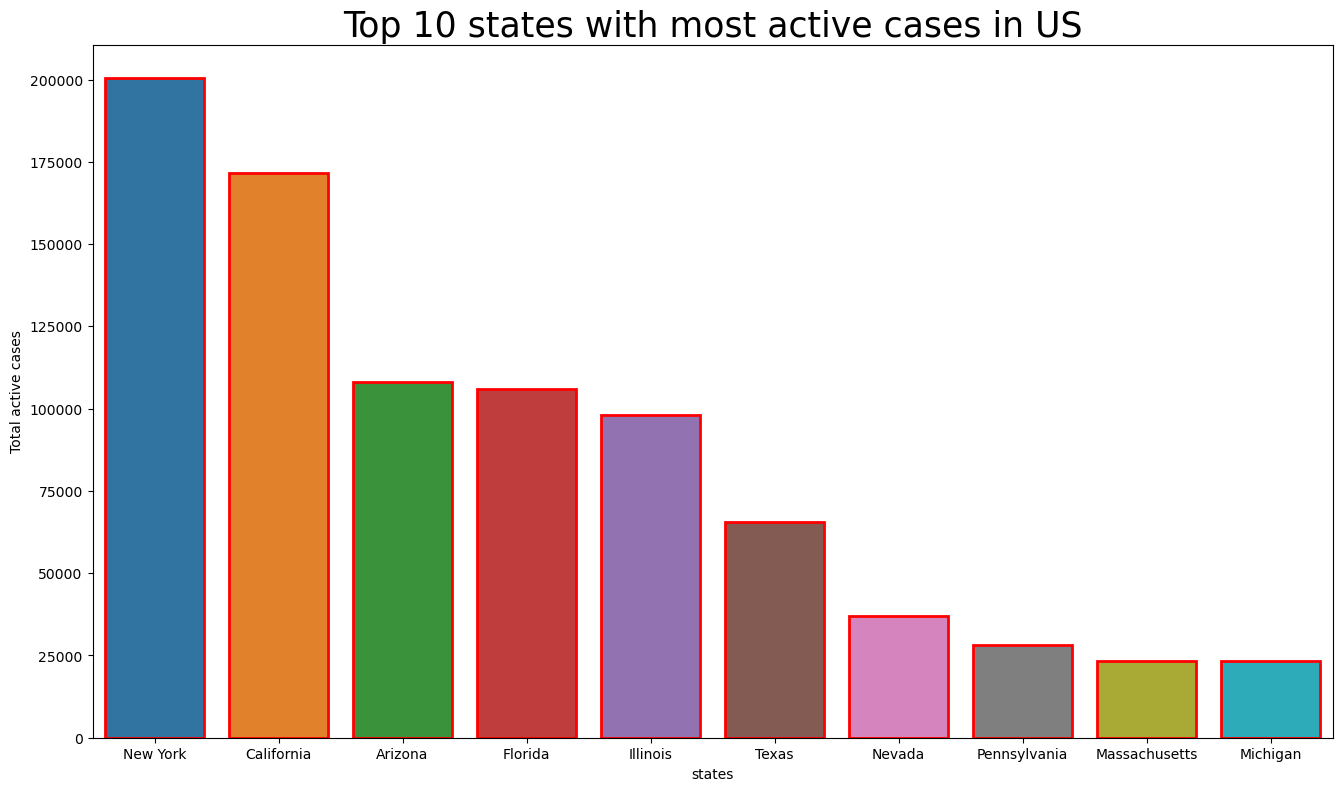

In [86]:
# Top 10 active cases states
top_10_state_active_cases = covid_df.groupby(by='Province_State').max()[['active_cases','Date']].sort_values(by=['active_cases'],ascending=False).reset_index()
fig = plt.figure(figsize = (16,9))
plt.title("Top 10 states with most active cases in US",size = 25)
ax = sns.barplot(data = top_10_state_active_cases.iloc[:10], y = 'active_cases', x = 'Province_State',linewidth = 2,edgecolor ='red')
plt.xlabel("states")
plt.ylabel("Total active cases")
plt.show()

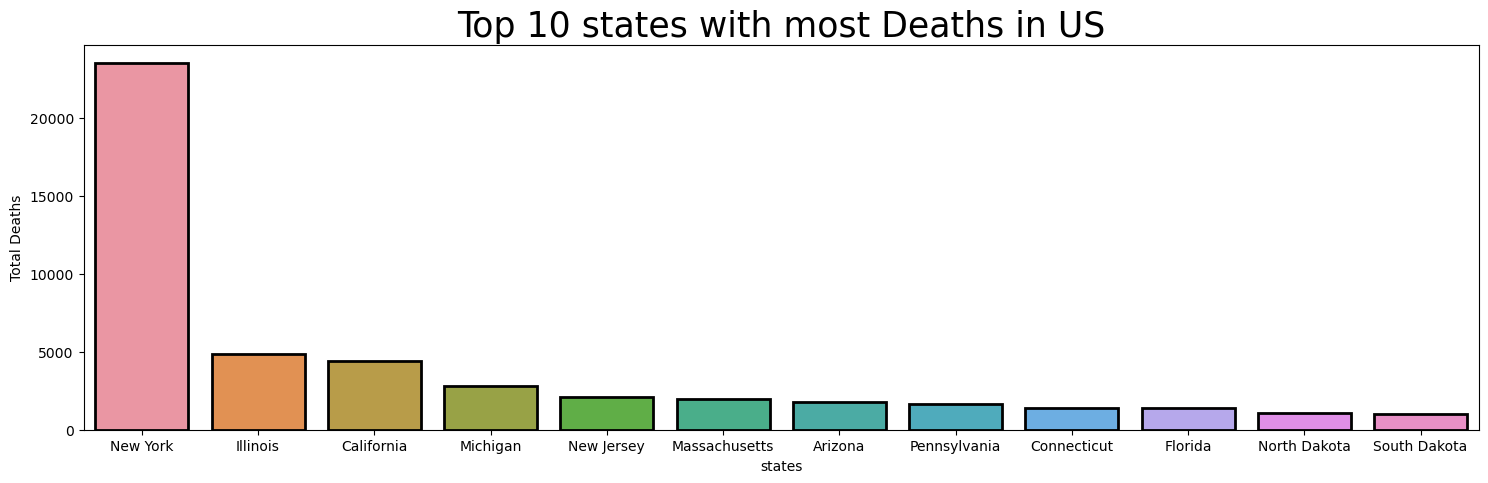

In [91]:
# Top 10 death cases states
top_10_states_death = covid_df.groupby(by='Province_State').max()[['Deaths','Date']].sort_values(by=['Deaths'],ascending=False).reset_index()
fig = plt.figure(figsize = (18,5))
plt.title("Top 10 states with most Deaths in US",size = 25)
ax = sns.barplot(data = top_10_states_death.iloc[:12], y = 'Deaths', x = 'Province_State',linewidth = 2,edgecolor ='black')
plt.xlabel("states")
plt.ylabel("Total Deaths")
plt.show()

Text(0.5, 1.0, 'Top 5 state most affected in US')

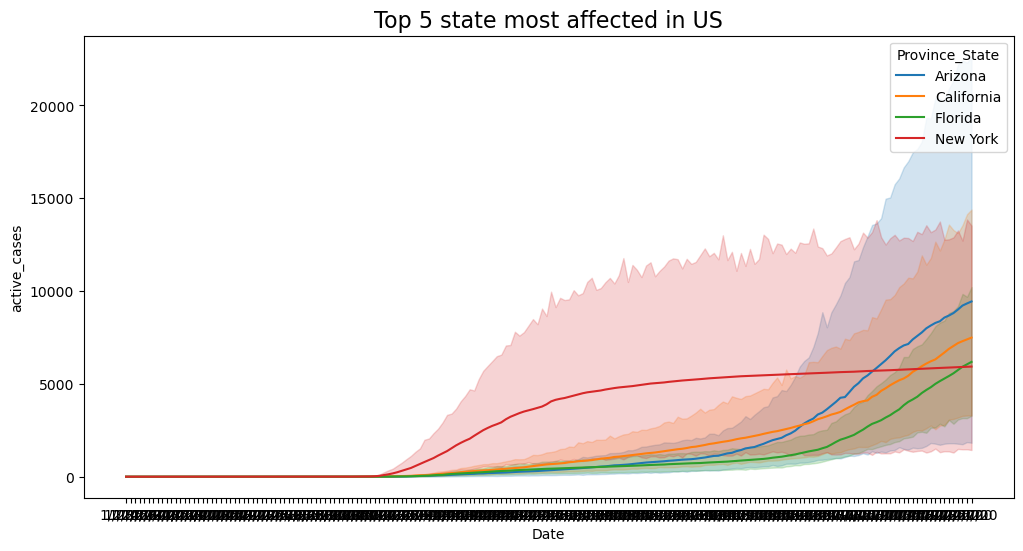

In [119]:
# Growth Trend 
fig = plt.figure(figsize = (12,6))

#ax = sns.lineplot(data = covid_df[covid_df['Province_State'].isin(['New York','California','Arizona','Florida','illinois']),x = "Date",y = "active_cases",hue = "Province_State"])

#ax = sns.lineplot(data = covid_df[covid_df["Province_State"]])
ax = sns.lineplot(data = covid_df[covid_df['Province_State'].isin(['New York','California','Arizona','Florida','illinois'])],y = 'active_cases', x = 'Date',hue = 'Province_State')
ax.set_title("Top 5 state most affected in US", size = 16)

In [120]:
covid_v.head(10)

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,11/18/2021,05075,46,Lawrence County,AR,42.3,6938,6938.0,49.4,6534,...,C,11.0,11.0,12.0,12.0,Non-metro,7.0,7.0,8.0,8.0
1,11/18/2021,01053,46,Escambia County,AL,33.1,12112,12112.0,38.8,11677,...,D,14.0,14.0,15.0,15.0,Non-metro,6.0,6.0,7.0,7.0
2,11/18/2021,19171,46,Tama County,IA,58.0,9777,9777.0,68.8,9132,...,B,8.0,8.0,8.0,8.0,Non-metro,8.0,8.0,8.0,8.0
3,11/18/2021,06043,46,Mariposa County,CA,0.0,0,0.0,0.0,0,...,C,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
4,11/18/2021,19097,46,Jackson County,IA,49.2,9568,9568.0,57.4,9217,...,A,3.0,4.0,4.0,4.0,Non-metro,7.0,8.0,8.0,8.0
5,11/18/2021,21009,46,Barren County,KY,41.5,18351,18351.0,49.1,17377,...,D,15.0,15.0,16.0,16.0,Non-metro,7.0,7.0,8.0,8.0
6,11/18/2021,27077,46,Lake of the Woods County,MN,51.8,1939,1937.0,58.8,1860,...,A,4.0,4.0,4.0,4.0,Non-metro,8.0,8.0,8.0,8.0
7,11/18/2021,72079,46,Lajas Municipio,PR,70.7,15565,15562.0,79.3,14393,...,D,16.0,16.0,16.0,16.0,Metro,4.0,4.0,4.0,4.0
8,11/18/2021,37001,46,Alamance County,NC,52.5,89037,88967.0,61.3,83448,...,D,16.0,16.0,16.0,16.0,Metro,4.0,4.0,4.0,4.0
9,11/18/2021,02180,46,Nome Census Area,AK,61.9,6189,6158.0,81.4,5379,...,D,16.0,16.0,16.0,16.0,Non-metro,8.0,8.0,8.0,8.0


In [122]:
vaccine_df = pd.read_csv(r"C:\Users\Alekh\Downloads\archive (5)\us_state_vaccinations.csv")
vaccine_df.head(10)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN
5,2021-01-17,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7509.0,1531.0,NaN,NaN,NaN
6,2021-01-18,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7517.0,1533.0,NaN,NaN,NaN
7,2021-01-19,Alabama,130795.0,444650.0,114319.0,0.33,2.67,16346.0,2.33,9.07,NaN,7523.0,1534.0,0.294,NaN,NaN
8,2021-01-20,Alabama,139200.0,483275.0,121113.0,0.37,2.84,17956.0,2.47,9.86,8405.0,7880.0,1607.0,0.288,NaN,NaN
9,2021-01-21,Alabama,165919.0,493125.0,144429.0,0.44,3.38,21345.0,2.95,10.06,26719.0,10517.0,2145.0,0.336,NaN,NaN


In [123]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54628 entries, 0 to 54627
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 54628 non-null  object 
 1   location                             54628 non-null  object 
 2   total_vaccinations                   32532 non-null  float64
 3   total_distributed                    32272 non-null  float64
 4   people_vaccinated                    32268 non-null  float64
 5   people_fully_vaccinated_per_hundred  30651 non-null  float64
 6   total_vaccinations_per_hundred       30750 non-null  float64
 7   people_fully_vaccinated              32188 non-null  float64
 8   people_vaccinated_per_hundred        30726 non-null  float64
 9   distributed_per_hundred              30730 non-null  float64
 10  daily_vaccinations_raw               28354 non-null  float64
 11  daily_vaccinations          

In [124]:
vaccine_df.rename(columns = {'date' : 'vaccine_date'},inplace = True)

In [125]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54628 entries, 0 to 54627
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   vaccine_date                         54628 non-null  object 
 1   location                             54628 non-null  object 
 2   total_vaccinations                   32532 non-null  float64
 3   total_distributed                    32272 non-null  float64
 4   people_vaccinated                    32268 non-null  float64
 5   people_fully_vaccinated_per_hundred  30651 non-null  float64
 6   total_vaccinations_per_hundred       30750 non-null  float64
 7   people_fully_vaccinated              32188 non-null  float64
 8   people_vaccinated_per_hundred        30726 non-null  float64
 9   distributed_per_hundred              30730 non-null  float64
 10  daily_vaccinations_raw               28354 non-null  float64
 11  daily_vaccinations          

In [127]:
vaccine_df.isnull().sum()

vaccine_date                               0
location                                   0
total_vaccinations                     22096
total_distributed                      22356
people_vaccinated                      22360
people_fully_vaccinated_per_hundred    23977
total_vaccinations_per_hundred         23878
people_fully_vaccinated                22440
people_vaccinated_per_hundred          23902
distributed_per_hundred                23898
daily_vaccinations_raw                 26274
daily_vaccinations                        65
daily_vaccinations_per_million          2912
share_doses_used                       22356
total_boosters                         36512
total_boosters_per_hundred             37374
dtype: int64

In [130]:
vaccine_df = vaccine_df[vaccine_df.location!='United States']

In [131]:
max_loc = vaccine_df.groupby('location')['total_vaccinations'].sum().to_frame('total_vaccinations')

In [132]:
max_vac = max_loc.sort_values('total_vaccinations', ascending = False)[:5]
max_vac

,total_vaccinations
location,
California,1.932592e+10
Texas,1.432154e+10
New York State,1.415496e+10
Florida,1.376496e+10
Pennsylvania,7.698437e+09


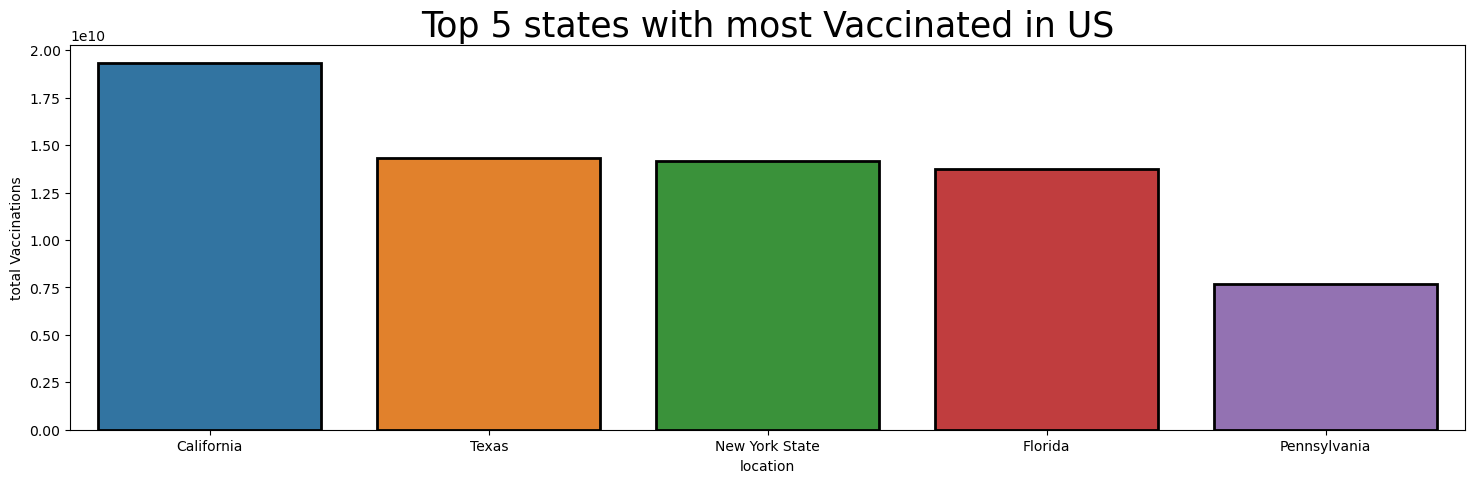

In [136]:
fig = plt.figure(figsize = (18,5))
plt.title("Top 5 states with most Vaccinated in US",size = 25)
ax = sns.barplot(data = max_vac.iloc[:10], y = max_vac.total_vaccinations, x =max_vac.index,linewidth = 2, edgecolor ='black')
plt.xlabel("location")
plt.ylabel("total Vaccinations")
plt.show()